<a href="https://colab.research.google.com/github/yamini1219/NLP/blob/main/Legal_NLI_joelniklaus/legal-english-roberta-base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from torch.utils.data import DataLoader,Dataset

In [31]:
data=pd.read_csv('/content/LegalLensNLI.csv',nrows=1000)
data.head()


,premise,hypothesis,legal_act,label
0,Consumers who used an ADP timeclock in Illinoi...,Really been enjoying that ADP timeclock at wor...,privacy,Neutral
1,"Superior Health Linens has agreed to pay $790,...",Been punching in and out with this hand scanne...,privacy,Neutral
2,DEFENDANT has agreed to pay $13 million to set...,Thoroughly enjoyed my interactions with the cu...,privacy,Neutral
3,"DEFENDANT has agreed to a $72,250 settlement t...","Y'know, it's funny how things turn out sometim...",privacy,Entailed
4,A $14 million settlement has been reached in a...,"Been loving my HelloFresh meals, y'all! Their ...",tcpa,Contradict


In [32]:
x=data[['premise','hypothesis']].astype(str)
y=data['label'].astype(str)

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_encoded=labelencoder.fit_transform(y)

In [34]:
y_encoded

array([2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1,
       2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1,
       2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 0,
       1, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1,
       1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0,
       2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1,

In [35]:
!pip install transformers

In [36]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("joelniklaus/legal-english-roberta-base")
model = AutoModelForSequenceClassification.from_pretrained("joelniklaus/legal-english-roberta-base", num_labels=3)
x_tokenized=tokenizer(list(x['premise']),list(x['hypothesis']),padding=True ,truncation=True,return_tensors='pt')

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/696 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at joelniklaus/legal-english-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        if self.labels is not None:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

#create dataset instance
dataset=CustomDataset(x_tokenized,y_encoded)


In [38]:
#create DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=False)

In [39]:
!pip install torch

Accuracy: 0.3846


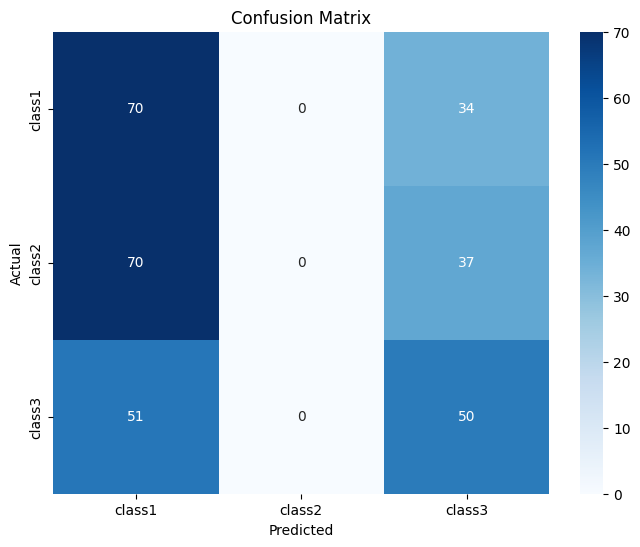

In [40]:
import torch
import seaborn as sns
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['class1', 'class2', 'class3'])

def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']
            outputs = model(input_ids, attention_mask=attention_mask)
            _, predicted = torch.max(outputs.logits, dim=1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return np.array(y_true), np.array(y_pred)

# Evaluate model
y_true, y_pred = evaluate_model(model, dataloader)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()